In [1]:
print("hi")

hi


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# ---------------- PHASE 3 METRICS ----------------
epochs = np.arange(1, 9)

train_accuracy = [0.4291, 0.4488, 0.4742, 0.4892, 0.5082, 0.5181, 0.5379, 0.5456]
val_accuracy   = [0.5558, 0.5834, 0.5881, 0.5905, 0.6081, 0.6110, 0.6163, 0.6210]

train_loss = [2.5943, 2.4803, 2.3997, 2.3254, 2.2583, 2.1971, 2.1537, 2.1287]
val_loss   = [2.1685, 2.1064, 2.0862, 2.0464, 2.0349, 1.9931, 1.9789, 1.9835]

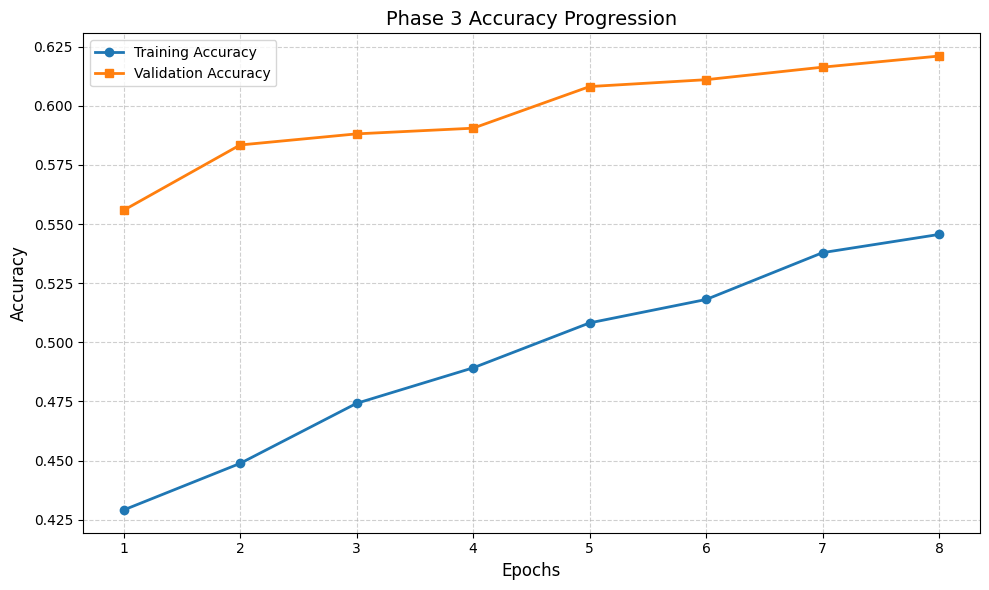

In [3]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_accuracy, marker='o', linewidth=2, label="Training Accuracy")
plt.plot(epochs, val_accuracy, marker='s', linewidth=2, label="Validation Accuracy")

plt.title("Phase 3 Accuracy Progression", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

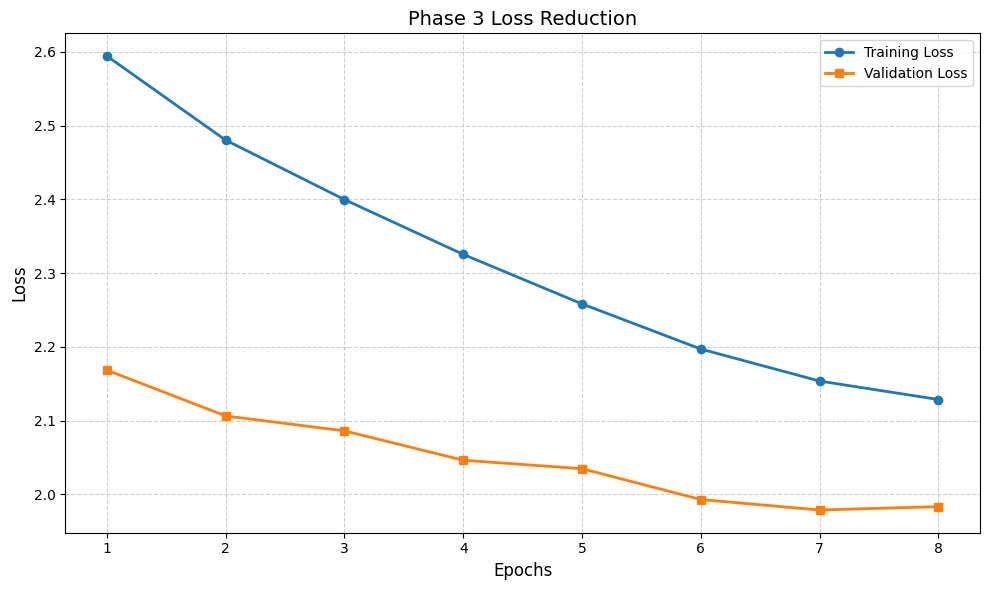

In [4]:
plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, marker='o', linewidth=2, label="Training Loss")
plt.plot(epochs, val_loss, marker='s', linewidth=2, label="Validation Loss")

plt.title("Phase 3 Loss Reduction", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

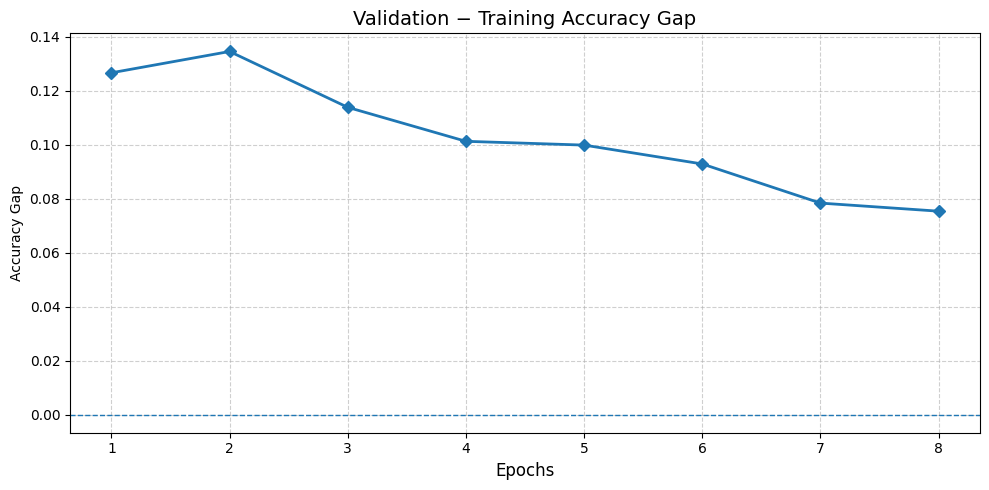

In [5]:
accuracy_gap = np.array(val_accuracy) - np.array(train_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracy_gap, marker='D', linewidth=2)

plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Validation − Training Accuracy Gap", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy Gap")

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

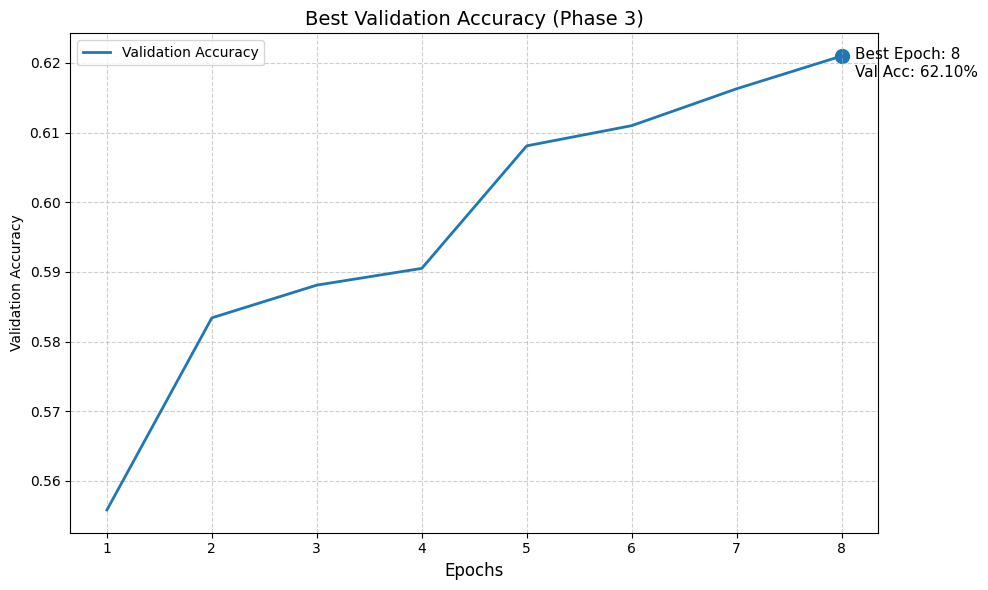

In [6]:
best_epoch = epochs[np.argmax(val_accuracy)]
best_val_acc = max(val_accuracy)

plt.figure(figsize=(10, 6))

plt.plot(epochs, val_accuracy, linewidth=2, label="Validation Accuracy")
plt.scatter(best_epoch, best_val_acc, s=100)

plt.annotate(
    f"Best Epoch: {best_epoch}\nVal Acc: {best_val_acc:.2%}",
    (best_epoch, best_val_acc),
    textcoords="offset points",
    xytext=(10, -15),
    fontsize=11
)

plt.title("Best Validation Accuracy (Phase 3)", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Validation Accuracy")

plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# ---------------- LOAD MODEL ----------------
model = tf.keras.models.load_model(
    "models/efficientnetv2-b0_phase3_final.keras"
)

# ---------------- LOAD TEST DATA ----------------
TEST_DIR = "dataset/test"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = test_ds.class_names

# ---------------- PREDICTIONS ----------------
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# ---------------- CONFUSION MATRIX ----------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14, 12))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()

plt.xticks(range(len(class_names)), class_names, rotation=90)
plt.yticks(range(len(class_names)), class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ---------------- PER-CLASS ACCURACY ----------------
per_class_acc = cm.diagonal() / cm.sum(axis=1)

print("\nPer-Class Accuracy:\n")
for i, acc in enumerate(per_class_acc):
    print(f"{class_names[i]:25s}: {acc:.2%}")

ModuleNotFoundError: No module named 'tensorflow'